# Cloud Storage

In [ ]:
#Quicly create buckets with Cloud Shell
gsutil mb gs://your-project-name

## Data Processing

- **Dataproc**
- **Dataflow**

## Streaming data processing
*For real time analytics*
- **Pub/Sub**
- **Dataflow**
- **BigQuery**

## GCP Servicew

**Data Catalog:**

- **Simplify data discovery at any scale:** Fully managed metadata management service with no infrastructure to set up or manage.

- **Unified view of all datasets:** Central and secure data catalog across Google Cloud with metadata capture and tagging

- **Data governance foundation:** Security compliance with access level controls along with Cloud Data Loss Prevention intefration for handeling sensitive data.

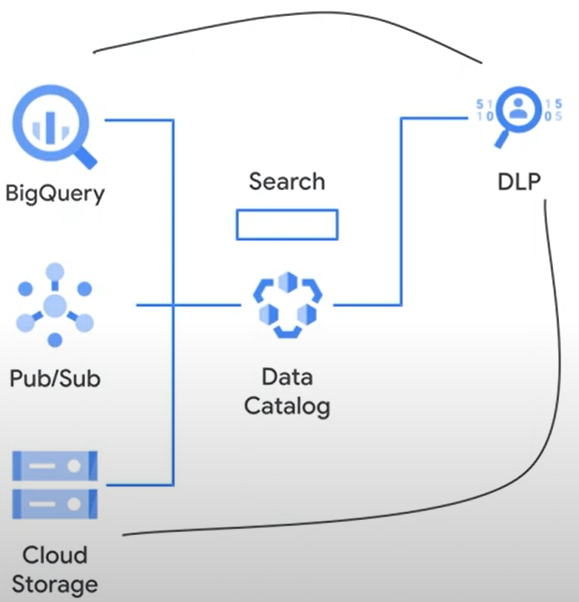

**Cloud composer** it's an *Apache Airflow* integrated pipeline GCP system

# Recap

**Data Sources** fees into a **Data Lake** (*Cloud Storage*) and are processed into your **Data Warehouse** for analysis (*Big Query*)

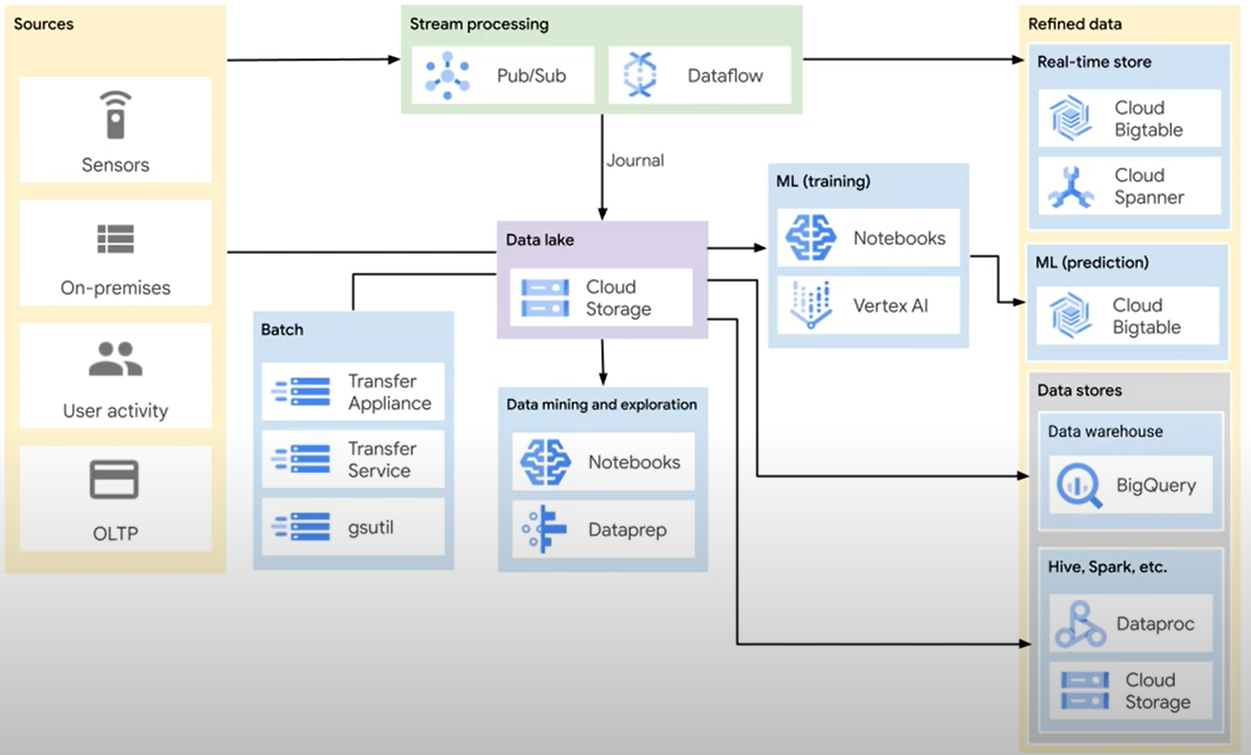

## GCP Cheat Sheet

In [ ]:
https://github.com/priyankavergadia/google-cloud-4-words

# Building Data Lakes

A **data lake** is a capture of every aspect of your business operation. The data stored in its natural/raw format, usually as object blobs or files.
- Retain all data in its native format
- Support all data types and all users
- Adapt to changes easily
- Tends to be application-specific

A **data warehouse** typically has the following characteristic:
- Typically loaded only after a use case is defined.
- Processed/organized/transformed.
- Provide faster insights
- Current/historical data for reporting.
-Tends to have consistent schema shared across applications.

## Storage solutions to build a data lake in GCP

- Catch all
    - **Cloud Storage**
- RDS
    - **Cloud SQL**
    - **Cloud Spanner**
- NoSQL
    - **Firestore**
    - **Cloud Bigtable**

In [ ]:
#Cloud Storage file access
gs://declass/de/modules/02/script.sh

#Web access
gttos://storage.cloud.google.com/declass/de/module/02/script.sh

## Cloud SQL

**Default option for OLTP RDBS, Relational Data Lake**

- For OTL's RDBs a default tool is Cloud SQL
    - If the DB is big (many GB's) you need a distributive DB therefore **Cloud Spaner** it's a better option
- If not **Cloud SQL** is more efective
- For low latency us **Cloud big Table**
    - Other than that use **Big Query** because is more cost effective

## Google Cloud SQL LAB

### Google Cloud Shell

**You can list the active account name with this command:**

<code>gcloud auth list</code>

**You can list the project ID with this command:**

<code>gcloud config list project</code>

### Preparing your Environment
Create environment variables that will be used later in the lab for your project ID and the storage bucket that will contain your data:

<code>export PROJECT_ID=$(gcloud info --format='value(config.project)')
export BUCKET=${PROJECT_ID}-ml</code>

### Create a Cloud SQL instance
Enter the following commands to create a Cloud SQL instance:

<code>gcloud sql instances create taxi \
    --tier=db-n1-standard-1 --activation-policy=ALWAYS</code>

**Set a root password for the Cloud SQL instance:**

<code>gcloud sql users set-password root --host % --instance taxi \
 --password Passw0rd</code>

**Now create an environment variable with the IP address of the Cloud Shell:**

<code>export ADDRESS=$(wget -qO - http://ipecho.net/plain)/32 </code>

**Whitelist the Cloud Shell instance for management access to your SQL instance.**

<code> gcloud sql instances patch taxi --authorized-networks $ADDRESS </code>

**Get the IP address of your Cloud SQL instance by running:**

<code>MYSQLIP=$(gcloud sql instances describe \
taxi --format="value(ipAddresses.ipAddress)")</code>

**Check the variable MYSQLIP:**

<code>echo $MYSQLIP</code>

**you should get an IP address as an output.**

Create the taxi trips table by logging into the mysql command line interface.

<code>mysql --host=$MYSQLIP --user=root \
      --password --verbose</code>

**When prompted for a password enter Passw0rd. Paste the following content into the command line to create the schema for the trips table**

<code>create database if not exists bts;
use bts;
drop table if exists trips;
create table trips (
  vendor_id VARCHAR(16),		
  pickup_datetime DATETIME,
  dropoff_datetime DATETIME,
  passenger_count INT,
  trip_distance FLOAT,
  rate_code VARCHAR(16),
  store_and_fwd_flag VARCHAR(16),
  payment_type VARCHAR(16),
  fare_amount FLOAT,
  extra FLOAT,
  mta_tax FLOAT,
  tip_amount FLOAT,
  tolls_amount FLOAT,
  imp_surcharge FLOAT,
  total_amount FLOAT,
  pickup_location_id VARCHAR(16),
  dropoff_location_id VARCHAR(16)
);</code>

**In the mysql command line interface check the import by entering the following commands:**

<code>describe trips;</code>

**Query the trips table:**

<code>select distinct(pickup_location_id) from trips;</code>

**Exit the mysql interactive console:**

<code>Exit</code>

### Add data to Cloud SQL instance

**Now you'll copy the New York City taxi trips CSV files stored on Cloud Storage locally. To keep resource usage low, you'll only be working with a subset of the data (~20,000 rows).**

<code>gsutil cp gs://cloud-training/OCBL013/nyc_tlc_yellow_trips_2018_subset_1.csv trips.csv-1
gsutil cp gs://cloud-training/OCBL013/nyc_tlc_yellow_trips_2018_subset_2.csv trips.csv-2</code>

**Import the CSV file data into Cloud SQL using mysql:**

<code>mysqlimport --local --host=$MYSQLIP --user=root --password \
--ignore-lines=1 --fields-terminated-by=',' bts trips.csv-*</code>

**Connect to the mysql interactive console:**

<code>mysql --host=$MYSQLIP --user=root  --password</code>

### Checking for data integrity

**In the mysql interactive console select the database:**

<code>use bts;</code>

**Query the trips table for unique pickup location regions:**

<code>select distinct(pickup_location_id) from trips;</code>

**This should return 159 unique ids. Let's start by digging into the trip_distance column. Enter the following query into the console:**

<code>select
  max(trip_distance),
  min(trip_distance)
from
  trips;</code>

**One would expect the trip distance to be greater than 0 and less than, say 1000 miles. The maximum trip distance returned of 85 miles seems reasonable but the minimum trip distance of 0 seems buggy. How many trips in the dataset have a trip distance of 0?**

<code>select count(*) from trips where trip_distance = 0;</code>

**There should be 14 such trips returned. Again, these trips warrant further exploration. There may be a reasonable explanation for why the fares take on negative numbers. However, it's up to the data engineer to ensure there are no bugs in the data pipeline that would cause such a result.

Finally, let's investigate the payment_type column.**

<code>select
  payment_type,
  count(*)
from
  trips
group by
  payment_type;</code>

**Finish**

<code>exit</code>

# Data Warehouse

## Big Query

- Interactive SQL queries over large datasets (petabytes) in seconds
- Serverless and no-ops, including ad hoc queries
- Ecosystemm of visualization and reporting tools
- Ecosystem of ETL and data processing tools
- Up-to-the-minute data
- Machine learning
- Security collaboration

## Partioning and Clustering

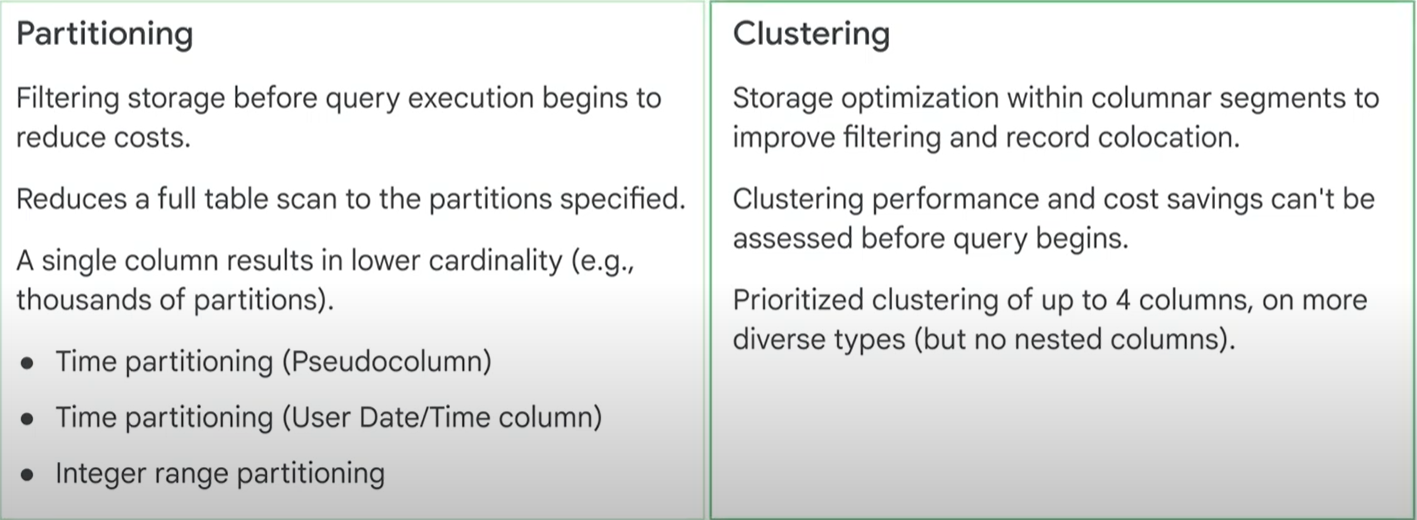

# Working with JSON and Array data in BigQuery

## Creating your own arrays with ARRAY_AGG()

**Now, we will use the ARRAY_AGG() function to aggregate our string values into an array.**

<code>SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date</code>

**Use the ARRAY_LENGTH() function to count the number of pages and products that were viewed.**

<code>SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_LENGTH(ARRAY_AGG(v2ProductName)) AS num_products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed,
  ARRAY_LENGTH(ARRAY_AGG(pageTitle)) AS num_pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date</code>

## Querying datasets that already have ARRAYs

**Before we can query REPEATED fields (arrays) normally, you must first break the arrays back into rows.**

*For example, the array for hits.page.pageTitle is stored currently as a single row like:*

<code>['homepage','product page','checkout']</code>

*and we need it to be*

<code>['homepage',
'product page',
'checkout']</code>

**Use the UNNEST() function on your array field:**

<code>SELECT DISTINCT
  visitId,
  h.page.pageTitle
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
UNNEST(hits) AS h
WHERE visitId = 1501570398
LIMIT 10</code>

## Introduction to STRUCTs

**The main advantage of having 32 STRUCTs in a single table is it allows you to run queries like this one without having to do any JOINs:**

<code>SELECT
  visitId,
  totals.*,
  device.*
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398
LIMIT 10</code>

Note: The .* syntax tells BigQuery to return all fields for that STRUCT (much like it would if totals.* was a separate table we joined against)

**Storing your large reporting tables as STRUCTs (pre-joined "tables") and ARRAYs (deep granularity) allows you to:**

- gain significant performance advantages by avoiding 32 table JOINs
- get granular data from ARRAYs when you need it but not be punished if you don't (BigQuery stores each column individually on disk)
- have all the business context in one table as opposed to worrying about JOIN keys and which tables have the data you need

## Practice with STRUCTs and ARRAYs

*What if you wanted to list the name of each runner and the type of race?
Run the below schema and see what happens:*

<code>#standardSQL
SELECT race, participants.name
FROM racing.race_results</code>

<code>Error: Cannot access field name on a value with type ARRAY\<STRUCT\<name STRING, splits ARRAY\<FLOAT64\>>>> at [1:21]</code>
    
*Much like forgetting to GROUP BY when you use aggregation functions, here there are two different levels of granularity. One row for the race and three rows for the participants names.*

**Cross Join**

<code>#standardSQL
SELECT race, participants.name
FROM racing.race_results
CROSS JOIN
participants  # this is the STRUCT (it's like a table within a table)</code>

<code>Error: Table name "participants" cannot be resolved: dataset name is missing.</code>

Even though the participants STRUCT is like a table, it is still technically a field in the <code>racing.race_results</code> table.

Add the Dataset name to the query:

<code>#standardSQL
SELECT race, participants.name
FROM racing.race_results
CROSS JOIN
race_results.participants # full STRUCT name</code>

## Examples UNNEST, STRUCT

### STRUCT()

<code>#standardSQL
SELECT COUNT(p.name) AS racer_count
FROM racing.race_results AS r, UNNEST(r.participants) AS p</code>

### UNPACKING ARRAYS with UNNEST()

<CODE>#standardSQL
SELECT
  p.name,
  SUM(split_times) as total_race_time
FROM racing.race_results AS r
, UNNEST(r.participants) AS p
, UNNEST(p.splits) AS split_times
WHERE p.name LIKE 'R%'
GROUP BY p.name
ORDER BY total_race_time ASC;</CODE>

### Filtering within ARRAY values

<code>#standardSQL
SELECT
  p.name,
  split_time
FROM racing.race_results AS r
, UNNEST(r.participants) AS p
, UNNEST(p.splits) AS split_time
WHERE split_time = 23.2;</code>